In [1]:
import numpy as np
from data import Instance, DataSet
from miscellaneous import initialize_data, plot_graph, plot_points
from neural_network import NeuralNetwork
from activation_function import *
import matplotlib.pyplot as plt
from keras.datasets import mnist
import copy

/home/xeds/.conda/envs/atividade1/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


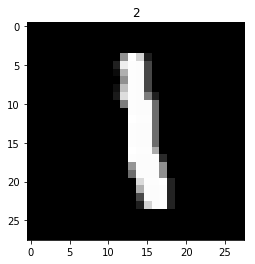

In [3]:
### leitura do dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Visualizar instâncias
plt.imshow(x_train[6], cmap=plt.get_cmap('gray'))
plt.title(y_train[5])



#### Descobrindo o número de instâncias, as dimensões de cada uma e normalizando.

In [4]:
num_instances, dim_x, dim_y = x_train.shape

In [9]:
norm_input_train = [np.divide(i.astype(np.float32),255).tolist() for i in x_train]

#for a,b in zip(x_train[0], normalized_input_list[0]):
#    for c,d in zip(a,b):
#        print(c, '=', d)

output_train = []
y = 10*[0.0]

for n in y_train:
    y[n] = 1.0
    output_train.append(copy.deepcopy(y))
    y[n] = 0.0

In [10]:
norm_input_test = [np.divide(i.astype(np.float32),255).tolist() for i in x_test]

output_test = []
y = 10*[0.0]

for n in y_test:
    y[n] = 1.0
    output_test.append(copy.deepcopy(y))
    y[n] = 0.0

In [11]:
dataset = DataSet(0,0) 
count = 0

for i,j in zip(norm_input_train + norm_input_test, output_train + output_test):
    dataset.add(Instance(i,j))
    if count == 3:
        dataset.printInstances()
    count += 1



[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0117647061124444, 0.07058823853731155, 0.07058823853731155, 0.07058823853731155, 0.4941176474094391, 0.5333333611488342, 0.686274528503418, 0.10196078568696976, 0.6509804129600525, 1.0, 0.9686274528503418, 0.49803921580314636,

In [8]:
net_1 = NeuralNetwork(dim_x*dim_y ,[10], [sig_func])
data_1 = net_1.fit(dataset, "stochastic", 1, learning_rate = 0.1, type = "class", tvt_ratio = [len(x_train), 0, len(x_test)], 
                            print_info = False)

ValueError: Error when checking input: expected dense_1_input to have shape (784,) but got array with shape (1,)